In [ ]:
pip install mlrose-hiive

     |████████████████████████████████| 49 kB 2.0 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=7d6735411f9f6bf162b1cc8f359705b8f58cf3ed9979fc6803b543ba87c65493
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [ ]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import MaxKColorGenerator, FlipFlopGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [ ]:
def eval_score (num_eval, f_score, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_eval, f_score)
  plt.title(f'Fitness Score - Number of Evaluation on {method}', fontsize= 18)
  plt.xlabel('# Fitness Function Evaluation', fontsize = 18)
  plt.ylabel('Fitness Score', fontsize = 18)
  plt.show()

In [ ]:
def eval_time (num_eval, time, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_eval, time)
  plt.title(f'Running Time/Number of Evaluation on {method}', fontsize = 18)
  plt.xlabel('# Fitness Function Evaluation', fontsize = 18)
  plt.ylabel('Running Time', fontsize = 18)
  plt.show()

In [ ]:
def iter_score (num_iter, fit, method):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.plot(num_iter, fit)
  plt.title(f'Fitness Score - Number of Iteration on {method}', fontsize = 18)
  plt.xlabel('# Iteration', fontsize = 18)
  plt.ylabel('Fitness Score', fontsize = 18)
  plt.show()

In [ ]:
def iter_compare (num_iter, fit_1, fit_2, label_1, label_2, xlabel, ylabel, title):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.title(f'{title} Comparison on Best Runner', fontsize = 18)
  plt.plot(num_iter, fit_1, label= label_1, color='r')
  plt.plot(num_iter, fit_2, label= label_2, color='b')
  plt.xlabel(xlabel, fontsize = 18)
  plt.ylabel(ylabel, fontsize = 18)
  plt.legend(loc='best')

In [ ]:
def iter_final_compare (num_iter, fit_1, fit_2, fit_3, fit_4, label_1, label_2, label_3, label_4, xlabel, ylabel, title):
  plt.figure(figsize=(14,10))
  plt.grid()
  plt.title(f'{title} Best Runners Comparison', fontsize = 18)
  plt.plot(num_iter, fit_1, label= label_1, color='r')
  plt.plot(num_iter, fit_2, label= label_2, color='b')
  plt.plot(num_iter, fit_3, label= label_3, color='g')
  plt.plot(num_iter, fit_4, label= label_4, color='black')
  plt.xlabel(xlabel, fontsize = 18)
  plt.ylabel(ylabel, fontsize = 18)
  plt.legend(loc='best')

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
% cd "/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2"

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #2


In [ ]:
from mlrose_hiive.generators import flip_flop_generator
# Generate a new Max K problem using a fixed seed.
problem = FlipFlopGenerator().generate(seed=0 , size=500)

In [ ]:
problem.get_state()

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
# The Answer to the problem
problem.get_fitness()

252.0

In [ ]:
rhc = RHCRunner(problem, experiment_name='flip_flop_rhc', seed = 0,
                iteration_list = 2 ** np.arange(15),
                restart_list = [10],  )

In [ ]:
df_rhc_stats, df_rhc_curves = rhc.run()

In [ ]:
df_rhc_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.005645,245.0,0.0,10,16384,0
1,1,0.016567,245.0,1.0,10,16384,0
2,2,0.022130,245.0,2.0,10,16384,0
3,3,0.028879,247.0,4.0,10,16384,0
4,4,0.030202,247.0,5.0,10,16384,0
...,...,...,...,...,...,...,...
24368,2136,4.545975,407.0,25245.0,10,16384,10
24369,2137,4.548365,407.0,25246.0,10,16384,10
24370,2138,4.550890,407.0,25247.0,10,16384,10
24371,2139,4.553303,407.0,25248.0,10,16384,10


In [ ]:
best_fitness_rhc = df_rhc_curves['Fitness'].max()

best_runs_rhc = df_rhc_curves[df_rhc_curves['Fitness'] == best_fitness_rhc]

best_runs_rhc

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
10524,1906,3.917301,413.0,10929.0,10,16384,4
10525,1907,3.922028,413.0,10930.0,10,16384,4
10526,1908,3.926206,413.0,10931.0,10,16384,4
10527,1909,3.928783,413.0,10932.0,10,16384,4
10528,1910,3.931216,413.0,10933.0,10,16384,4
...,...,...,...,...,...,...,...
11020,2402,5.277803,413.0,11425.0,10,16384,4
11021,2403,5.280416,413.0,11426.0,10,16384,4
11022,2404,5.283302,413.0,11427.0,10,16384,4
11023,2405,5.285979,413.0,11428.0,10,16384,4


In [ ]:
min_evaluation = best_runs_rhc['Iteration'].min()

optim_rhc = best_runs_rhc[best_runs_rhc['Iteration'] == min_evaluation]

optim_rhc 

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
10524,1906,3.917301,413.0,10929.0,10,16384,4


In [ ]:
# Best Param

current_restart = optim_rhc['current_restart'].iloc()[0]

best_params_rhc = df_rhc_stats[df_rhc_stats['current_restart'] == current_restart]

best_params_rhc

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
64,0,252.0,8942,35.327748,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
65,1,252.0,8943,35.356855,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
66,2,254.0,8945,35.387820,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
67,4,256.0,8948,35.424548,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
68,8,256.0,8952,35.471363,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
69,16,263.0,8964,35.550244,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
70,32,277.0,8987,35.693522,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
71,64,293.0,9027,35.938128,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
72,128,309.0,9099,36.400987,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4
73,256,329.0,9237,37.313920,"[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",10,16384,4


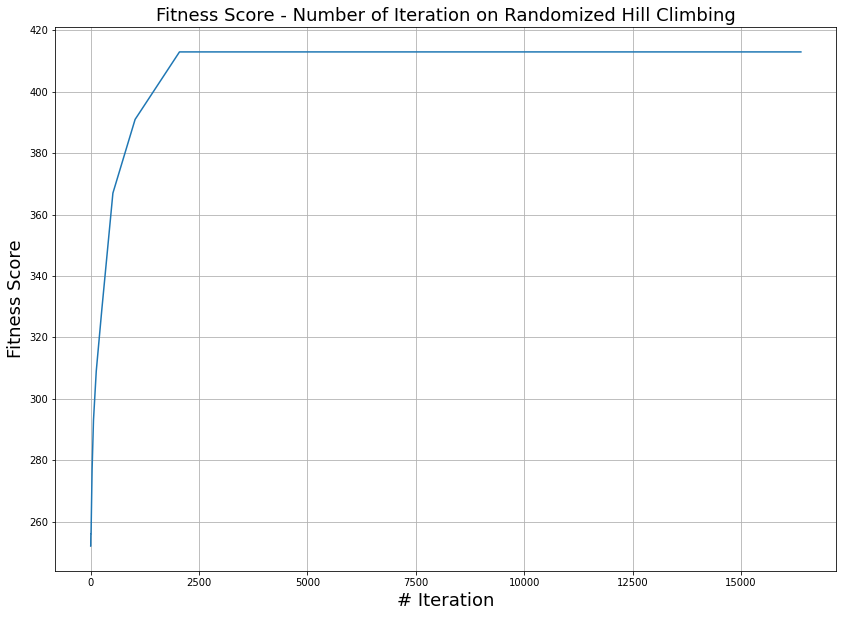

In [ ]:
iter_score(best_params_rhc['Iteration'], best_params_rhc['Fitness'], 'Randomized Hill Climbing')

SA


In [ ]:
sa = SARunner(problem, experiment_name='flip_flop_sa', seed = 0,
              iteration_list= 2 ** np.arange(15),
              temperature_list= [0.1, 2, 5, 10],
              decay_list= [mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

In [ ]:
df_sa_stats, df_sa_curves = sa.run()

In [ ]:
best_sa_fitness = df_sa_curves['Fitness'].max()

best_sa_runs = df_sa_curves[df_sa_curves['Fitness'] == best_sa_fitness]

best_sa_runs

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
48280,15510,103.747174,485.0,17875.0,2,16384
48281,15511,103.758652,485.0,17876.0,2,16384
48282,15512,103.770012,485.0,17877.0,2,16384
48283,15513,103.781663,485.0,17878.0,2,16384
48284,15514,103.793349,485.0,17879.0,2,16384
...,...,...,...,...,...,...
49150,16380,114.322393,485.0,18795.0,2,16384
49151,16381,114.335325,485.0,18796.0,2,16384
49152,16382,114.354874,485.0,18797.0,2,16384
49153,16383,114.368034,485.0,18798.0,2,16384


In [ ]:
temperature = best_sa_runs['Temperature'].iloc()[0]

best_params_sa = df_sa_stats[df_sa_stats['Temperature'] == temperature]

best_params_sa

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
32,0,245.0,0,0.002485,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.999950,2,16384,NaN
33,1,243.0,2,0.069220,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.998609,2,16384,NaN
34,2,243.0,3,0.134810,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.997292,2,16384,NaN
35,4,243.0,6,0.205619,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.995871,2,16384,NaN
36,8,241.0,14,0.281320,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.994353,2,16384,NaN
37,16,243.0,27,0.359944,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.992778,2,16384,NaN
38,32,253.0,58,0.463329,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.990708,2,16384,NaN
39,64,263.0,119,0.612540,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.987725,2,16384,NaN
40,128,299.0,230,0.816836,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.983648,2,16384,NaN
41,256,333.0,438,1.150621,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, ...",geometric,2.0,0.99,0.001,1.977005,2,16384,NaN


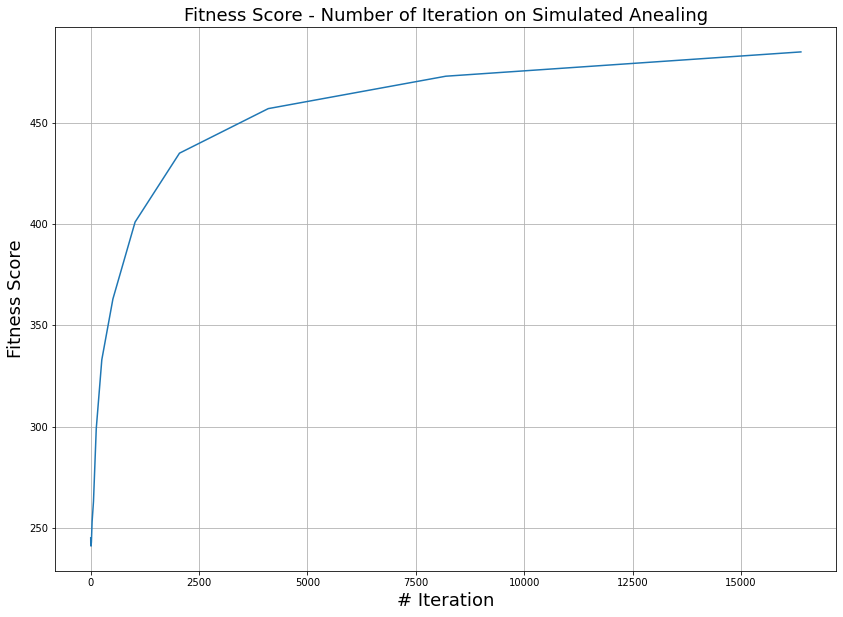

In [ ]:
iter_score(best_params_sa['Iteration'], best_params_sa['Fitness'], 'Simulated Anealing')

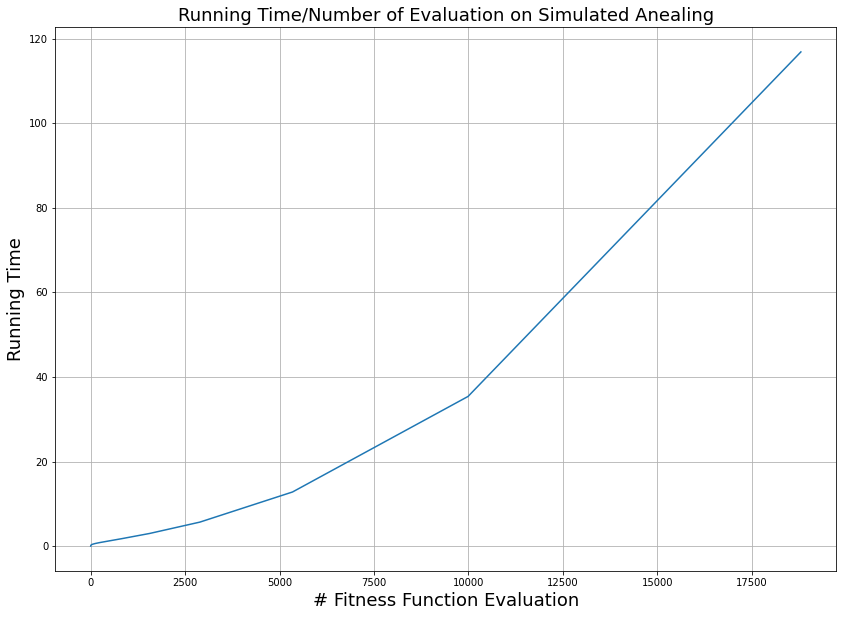

In [ ]:
eval_time(best_params_sa['FEvals'], best_params_sa['Time'], 'Simulated Anealing')

In [ ]:
exp_decay = df_sa_stats['schedule_type'].unique()[1]

df_stats_sa_exp = df_sa_stats[(df_sa_stats['schedule_init_temp'] == 2) & 
                              (df_sa_stats['schedule_type'] == exp_decay)]

df_stats_sa_exp                              

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
48,0,245.0,0,0.002530,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.999975,2,16384,0.005
49,1,243.0,2,0.098740,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.999013,2,16384,0.005
50,2,243.0,3,0.199239,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.998009,2,16384,0.005
51,4,243.0,6,0.301179,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.996990,2,16384,0.005
52,8,241.0,14,0.408550,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.995919,2,16384,0.005
53,16,241.0,28,0.519456,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.994812,2,16384,0.005
54,32,249.0,60,0.650208,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.993508,2,16384,0.005
55,64,259.0,121,0.817177,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.991845,2,16384,0.005
56,128,287.0,236,1.076360,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.989265,2,16384,0.005
57,256,329.0,451,1.453612,"[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, ...",exponential,2.0,NaN,0.001,1.985517,2,16384,0.005


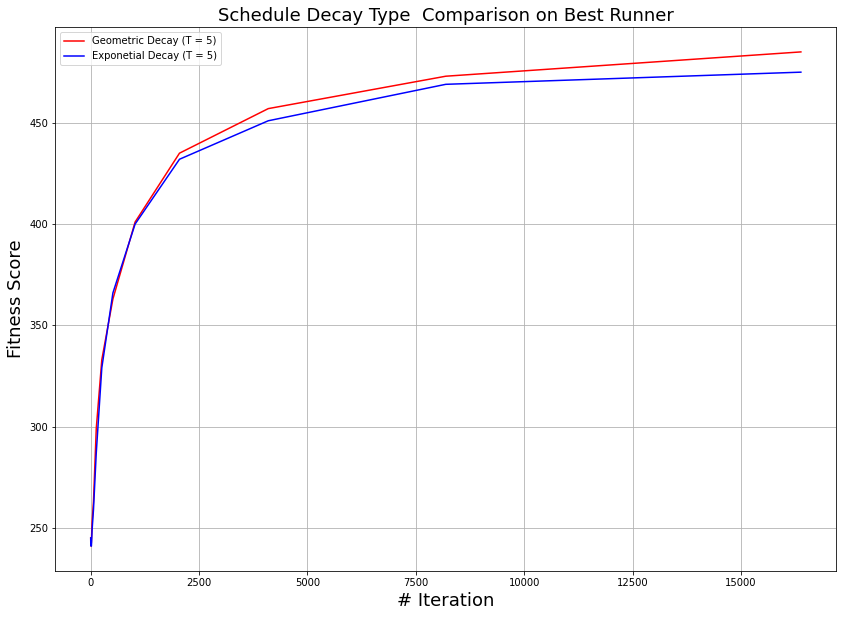

In [ ]:
iter_compare(best_params_sa['Iteration'], best_params_sa['Fitness'], df_stats_sa_exp['Fitness'], 'Geometric Decay (T = 5)', 'Exponetial Decay (T = 5)', '# Iteration', 'Fitness Score', 'Schedule Decay Type ')

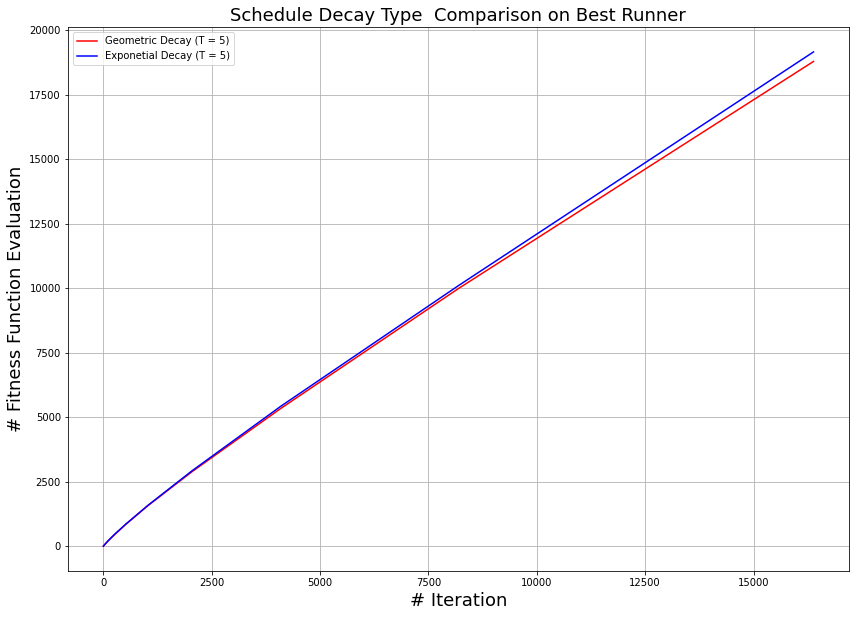

In [ ]:
iter_compare(best_params_sa['Iteration'], best_params_sa['FEvals'], df_stats_sa_exp['FEvals'], 'Geometric Decay (T = 5)', 'Exponetial Decay (T = 5)', '# Iteration', '# Fitness Function Evaluation', 'Schedule Decay Type ')

GA


In [ ]:
ga = GARunner(problem, experiment_name='flip_flop_ga', seed = 0,
              iteration_list = 2 ** np.arange(15),
              population_sizes= [50, 70, 100, 150],
              mutation_rates = [0.3, 0.5, 0.7])

In [ ]:
df_ga_stats, df_ga_curves = ga.run()

In [ ]:
best_fitness_ga = df_ga_curves['Fitness'].max()

best_runs_ga = df_ga_curves[df_ga_curves['Fitness'] == best_fitness_ga]

best_runs_ga

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
19501,1633,1.708800,463.0,1709.0,100,0.7,16384
19502,1634,1.714965,463.0,1710.0,100,0.7,16384
19503,1635,1.722409,463.0,1711.0,100,0.7,16384
19504,1636,1.728481,463.0,1712.0,100,0.7,16384
19505,1637,1.735664,463.0,1713.0,100,0.7,16384
...,...,...,...,...,...,...,...
19997,2129,4.916581,463.0,2205.0,100,0.7,16384
19998,2130,4.925639,463.0,2206.0,100,0.7,16384
19999,2131,4.936078,463.0,2207.0,100,0.7,16384
20000,2132,4.943917,463.0,2208.0,100,0.7,16384


In [ ]:
min_evaluation = best_runs_ga['FEvals'].min()

optim_ga = best_runs_ga[best_runs_ga['FEvals'] == min_evaluation]

optim_ga

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
19501,1633,1.7088,463.0,1709.0,100,0.7,16384


In [ ]:
# Best Params

mut_rate = optim_ga['Mutation Rate'].iloc[0]
pop_size = optim_ga['Population Size'].iloc[0] 

best_params_ga = df_ga_stats[(df_ga_stats['Mutation Rate'] == mut_rate ) &
                             (df_ga_stats['Population Size'] == pop_size)]

best_params_ga                             

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
128,0,245.0,0,0.004195,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",100,0.7,16384
129,1,280.0,2,0.062743,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",100,0.7,16384
130,2,280.0,3,0.119637,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",100,0.7,16384
131,4,285.0,7,0.188610,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",100,0.7,16384
132,8,299.0,14,0.281880,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",100,0.7,16384
133,16,316.0,26,0.414296,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",100,0.7,16384
134,32,334.0,48,0.644968,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",100,0.7,16384
135,64,364.0,92,1.089322,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",100,0.7,16384
136,128,400.0,172,1.873292,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",100,0.7,16384
137,256,424.0,312,3.346228,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",100,0.7,16384


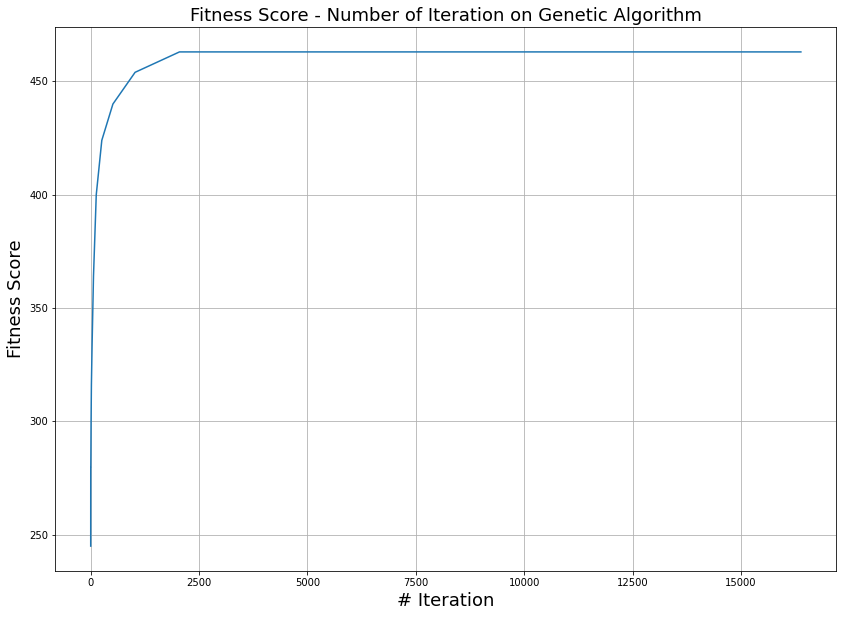

In [ ]:
iter_score(best_params_ga['Iteration'], best_params_ga['Fitness'], 'Genetic Algorithm')

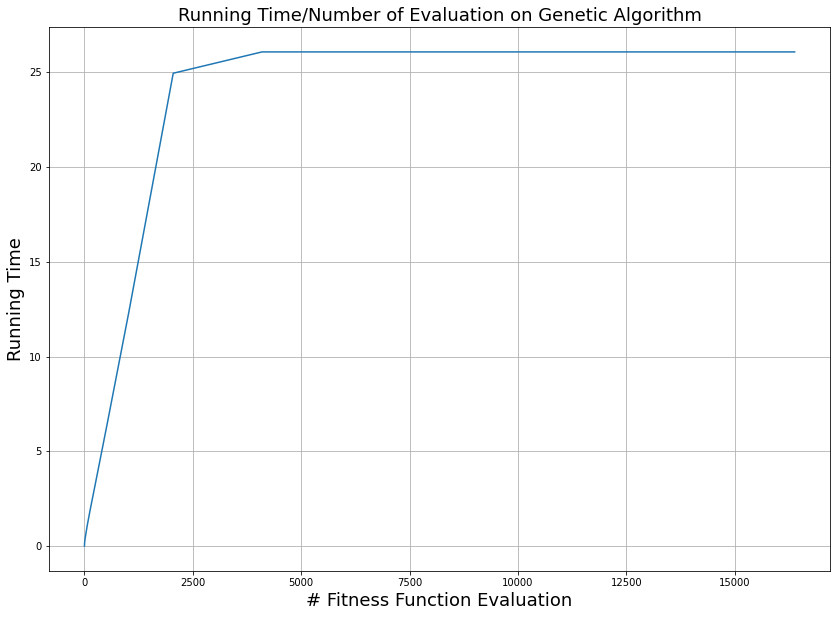

In [ ]:
eval_time(best_params_ga['Iteration'], best_params_ga['Time'], 'Genetic Algorithm')

In [ ]:
df_stats_ga_low_pop = df_ga_stats[(df_ga_stats['Mutation Rate'] == mut_rate ) &
                             (df_ga_stats['Population Size'] == 50)]

df_stats_ga_low_pop

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
32,0,245.0,0,0.003837,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",50,0.7,16384
33,1,280.0,2,0.027871,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",50,0.7,16384
34,2,280.0,3,0.050588,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",50,0.7,16384
35,4,283.0,6,0.081571,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",50,0.7,16384
36,8,291.0,12,0.124466,"[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",50,0.7,16384
37,16,311.0,27,0.195834,"[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",50,0.7,16384
38,32,325.0,50,0.318795,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...",50,0.7,16384
39,64,345.0,91,0.536563,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...",50,0.7,16384
40,128,381.0,173,1.002195,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...",50,0.7,16384
41,256,424.0,325,1.864523,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...",50,0.7,16384


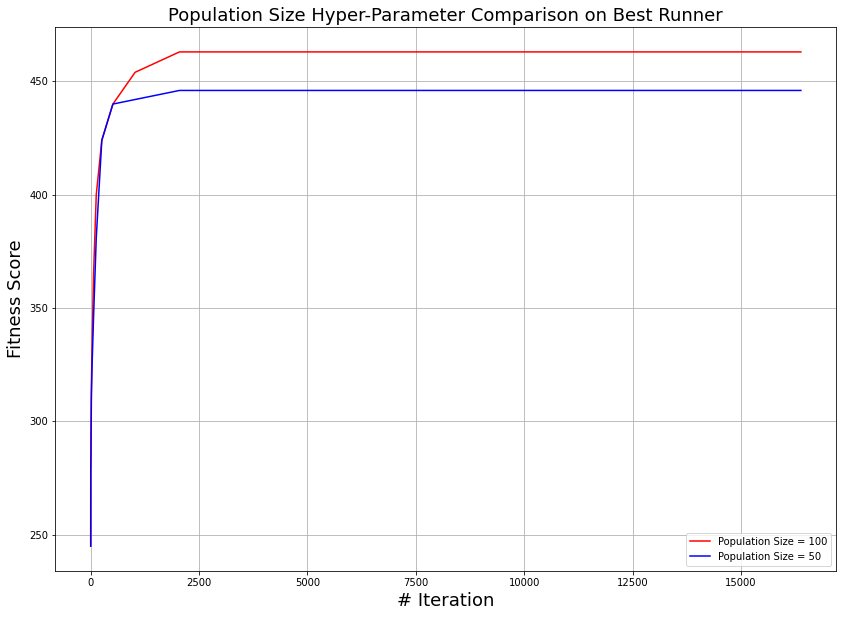

In [ ]:
iter_compare(best_params_ga['Iteration'], best_params_ga['Fitness'], df_stats_ga_low_pop['Fitness'], 'Population Size = 100', 'Population Size = 50', '# Iteration', 'Fitness Score', 'Population Size Hyper-Parameter')

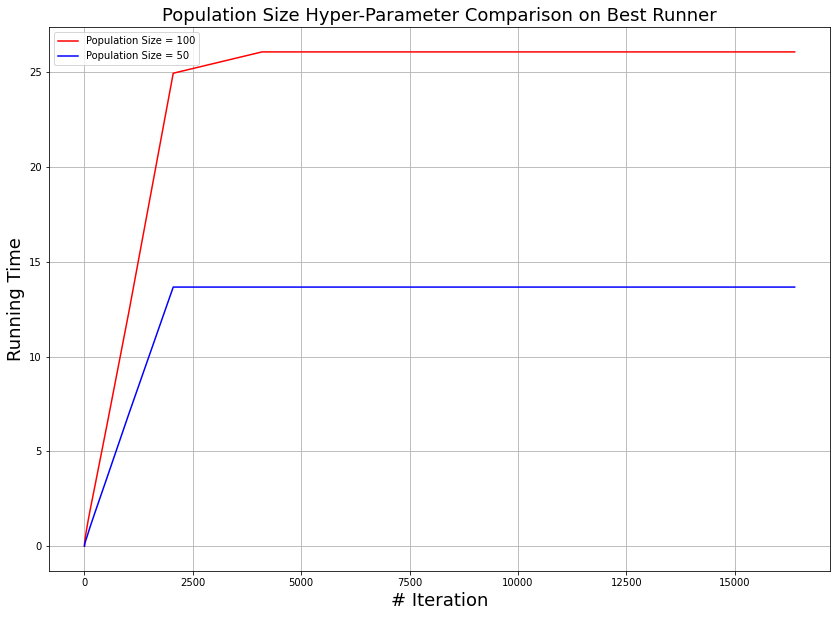

In [ ]:
iter_compare(best_params_ga['Iteration'], best_params_ga['Time'], df_stats_ga_low_pop['Time'], 'Population Size = 100', 'Population Size = 50', '# Iteration', 'Running Time', 'Population Size Hyper-Parameter')

In [ ]:
df_stats_ga_low_mut = df_ga_stats[(df_ga_stats['Mutation Rate'] == 0.3 ) &
                             (df_ga_stats['Population Size'] == pop_size)]

df_stats_ga_low_mut

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
96,0,245.0,0,0.004066,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",100,0.3,16384
97,1,280.0,2,0.052049,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",100,0.3,16384
98,2,285.0,4,0.099934,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",100,0.3,16384
99,4,290.0,7,0.161334,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",100,0.3,16384
100,8,297.0,13,0.245237,"[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",100,0.3,16384
101,16,310.0,25,0.374342,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",100,0.3,16384
102,32,323.0,45,0.598701,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",100,0.3,16384
103,64,346.0,90,1.015635,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",100,0.3,16384
104,128,382.0,172,1.771336,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",100,0.3,16384
105,256,401.0,311,3.226143,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",100,0.3,16384


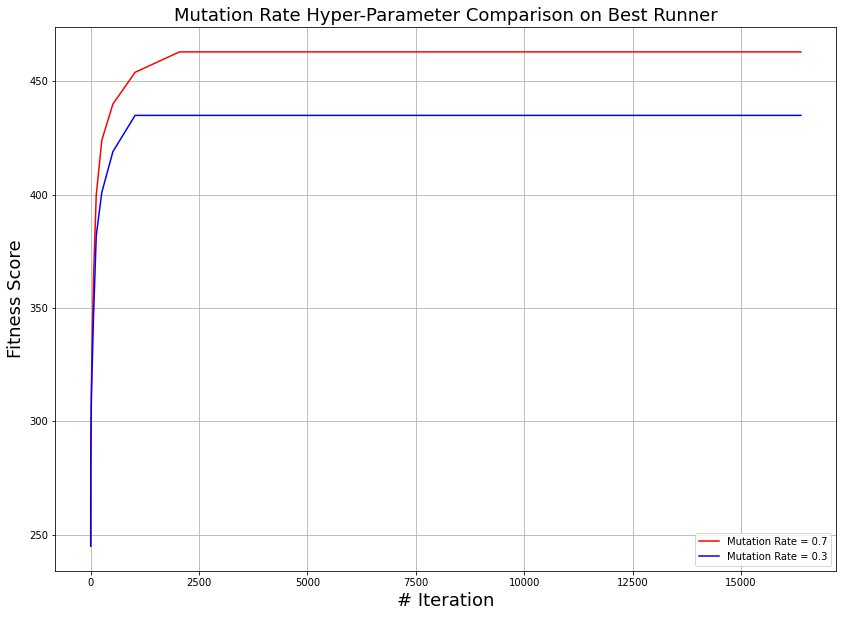

In [ ]:
iter_compare(best_params_ga['Iteration'], best_params_ga['Fitness'], df_stats_ga_low_mut['Fitness'], 'Mutation Rate = 0.7', 'Mutation Rate = 0.3', '# Iteration', 'Fitness Score', 'Mutation Rate Hyper-Parameter')

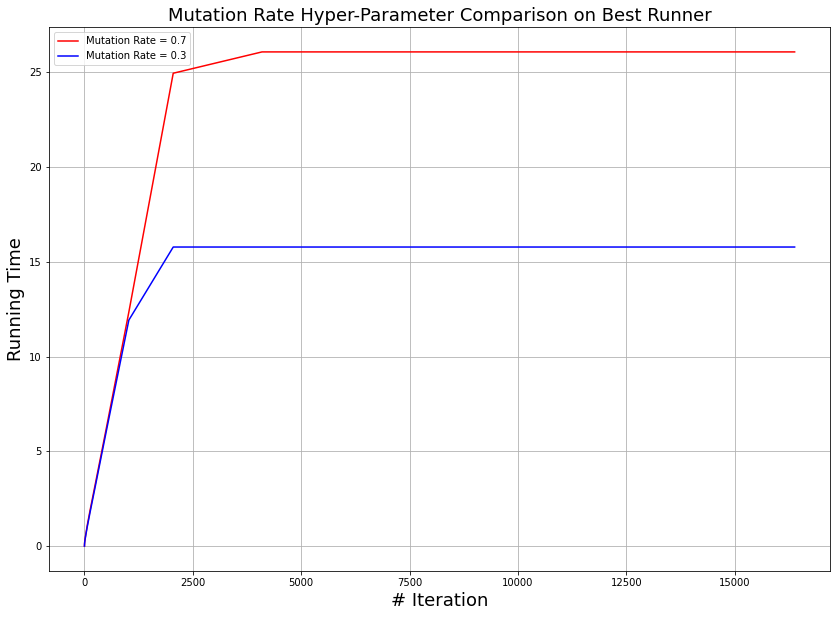

In [ ]:
iter_compare(best_params_ga['Iteration'], best_params_ga['Time'], df_stats_ga_low_mut['Time'], 'Mutation Rate = 0.7', 'Mutation Rate = 0.3', '# Iteration', 'Running Time', 'Mutation Rate Hyper-Parameter')



```
`# MIMC
`
```



In [ ]:
mc = MIMICRunner(problem, experiment_name= 'flip_flop_mc', seed = 0,
                 iteration_list = 2 ** np.arange(15),
                 population_sizes= [50, 70, 100, 150],
                 keep_percent_list= [0.3, 0.5, 0.8, 1], 
                 use_fast_mimic= True)

In [ ]:
df_mc_stats, df_mc_curves = mc.run()

In [ ]:
best_fitness_mc = df_mc_curves['Fitness'].max()

best_runs_mc = df_mc_curves[df_mc_curves['Fitness'] == best_fitness_mc]

best_runs_mc

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
7036,42,15.886524,397.0,70.0,True,150,0.5,16384
7037,43,16.292787,397.0,71.0,True,150,0.5,16384
7038,44,16.708615,397.0,72.0,True,150,0.5,16384
7039,45,17.116960,397.0,73.0,True,150,0.5,16384
7040,46,17.520893,397.0,74.0,True,150,0.5,16384
...,...,...,...,...,...,...,...,...
7532,538,10.207142,397.0,566.0,True,150,0.5,16384
7533,539,10.640403,397.0,567.0,True,150,0.5,16384
7534,540,11.056602,397.0,568.0,True,150,0.5,16384
7535,541,11.493918,397.0,569.0,True,150,0.5,16384


In [ ]:
min_Time_mc = best_runs_mc['Time'].min()

optim_mc = best_runs_mc[best_runs_mc['Time'] == min_Time_mc]

optim_mc

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
7504,510,0.00332,397.0,538.0,True,150,0.5,16384


In [ ]:
# Best Params

pop_size = optim_mc['Population Size'].iloc()[0]
keep_perc = optim_mc['Keep Percent'].iloc()[0]

best_params_mc = df_mc_stats[(df_mc_stats['Population Size'] == pop_size) &
                             (df_mc_stats['Keep Percent'] == keep_perc)]

best_params_mc                             

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
208,0,245.0,0,0.005130,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",True,150,0.5,16384
209,1,281.0,2,0.684005,"[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",True,150,0.5,16384
210,2,284.0,4,1.400125,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
211,4,284.0,6,2.739176,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
212,8,298.0,12,5.397777,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
213,16,314.0,24,10.648755,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
214,32,379.0,52,21.281635,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
215,64,397.0,92,49.701694,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
216,128,397.0,156,120.108903,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384
217,256,397.0,284,254.675935,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",True,150,0.5,16384


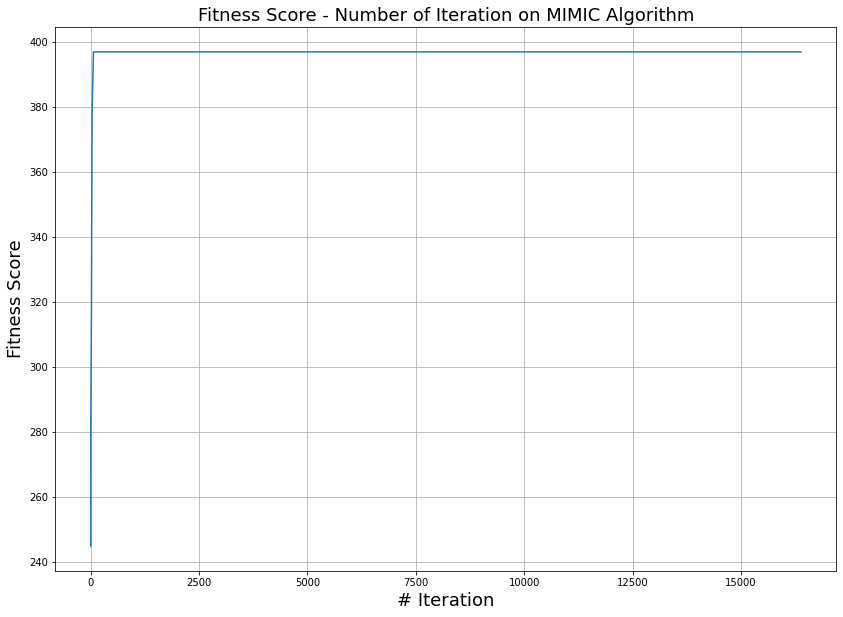

In [ ]:
iter_score(best_params_mc['Iteration'], best_params_mc['Fitness'], 'MIMIC Algorithm')

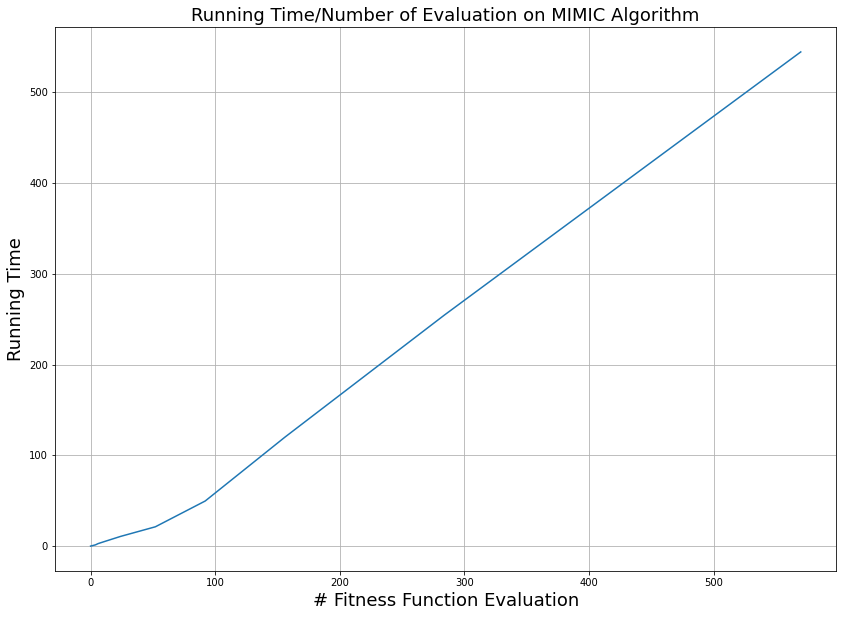

In [ ]:
eval_time(best_params_mc['FEvals'], best_params_mc['Time'],'MIMIC Algorithm')

In [ ]:
df_stats_mc_low_pop  = df_mc_stats[(df_mc_stats['Population Size'] == 50) &
                             (df_mc_stats['Keep Percent'] == keep_perc)]

df_stats_mc_low_pop

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
16,0,245.0,0,0.003320,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",True,50,0.5,16384
17,1,281.0,2,0.387553,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
18,2,281.0,3,0.745444,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
19,4,291.0,6,1.467376,"[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
20,8,304.0,12,2.905109,"[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
21,16,326.0,25,5.616169,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
22,32,328.0,42,11.915534,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
23,64,338.0,77,24.731647,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
24,128,338.0,141,52.301071,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384
25,256,338.0,269,106.266579,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",True,50,0.5,16384


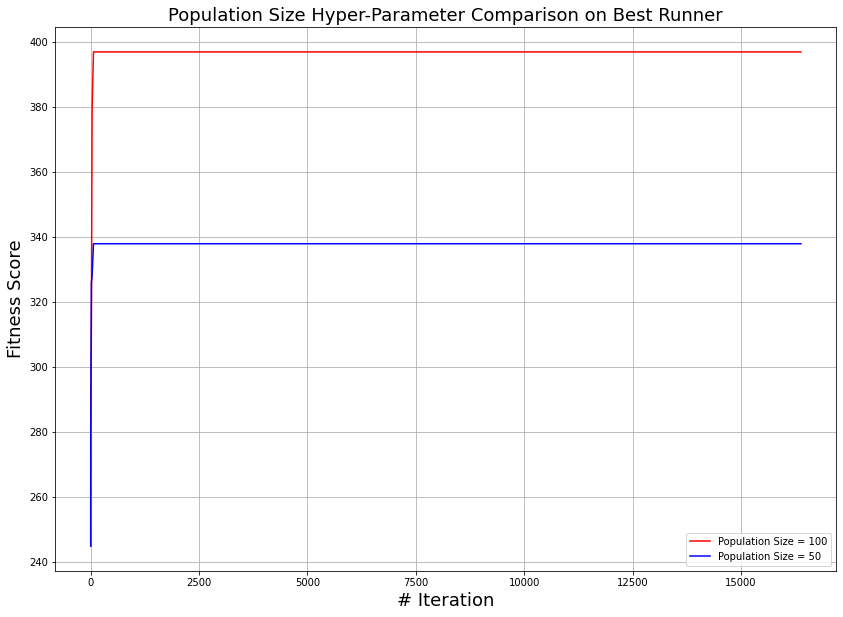

In [ ]:
iter_compare(best_params_mc['Iteration'], best_params_mc['Fitness'], df_stats_mc_low_pop['Fitness'], 'Population Size = 100', 'Population Size = 50', '# Iteration', 'Fitness Score', 'Population Size Hyper-Parameter')

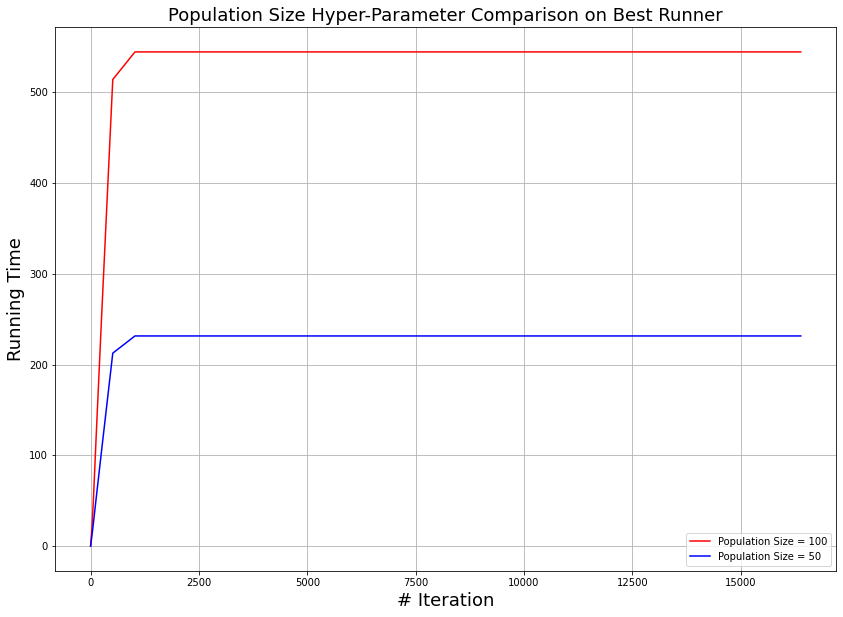

In [ ]:
iter_compare(best_params_mc['Iteration'], best_params_mc['Time'], df_stats_mc_low_pop['Time'], 'Population Size = 100', 'Population Size = 50', '# Iteration', 'Running Time', 'Population Size Hyper-Parameter')

In [ ]:
df_stats_mc_high_Keep = df_mc_stats[(df_mc_stats['Population Size'] == pop_size) &
                             (df_mc_stats['Keep Percent'] == 1)]

df_stats_mc_high_Keep                             

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
240,0,245.0,0,0.004967,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, ...",True,150,1.0,16384
241,1,277.0,2,1.111276,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",True,150,1.0,16384
242,2,277.0,3,2.232876,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",True,150,1.0,16384
243,4,278.0,6,4.417562,"[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",True,150,1.0,16384
244,8,280.0,11,8.796364,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...",True,150,1.0,16384
245,16,288.0,21,17.630397,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,150,1.0,16384
246,32,288.0,37,35.136907,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,150,1.0,16384
247,64,288.0,69,70.032099,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,150,1.0,16384
248,128,288.0,133,139.057239,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,150,1.0,16384
249,256,288.0,261,273.383425,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,150,1.0,16384


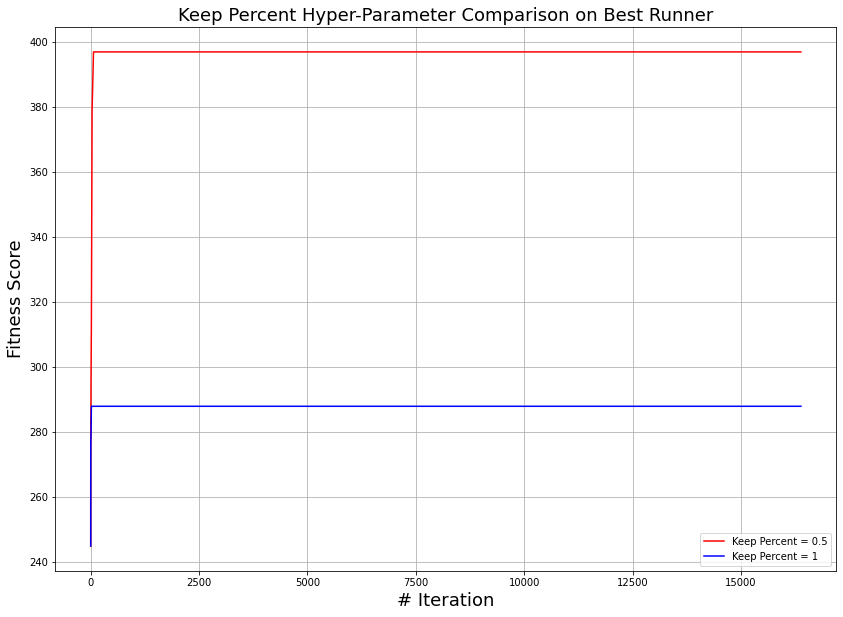

In [ ]:
iter_compare(best_params_mc['Iteration'], best_params_mc['Fitness'], df_stats_mc_high_Keep['Fitness'], 'Keep Percent = 0.5', 'Keep Percent = 1', '# Iteration', 'Fitness Score', 'Keep Percent Hyper-Parameter')

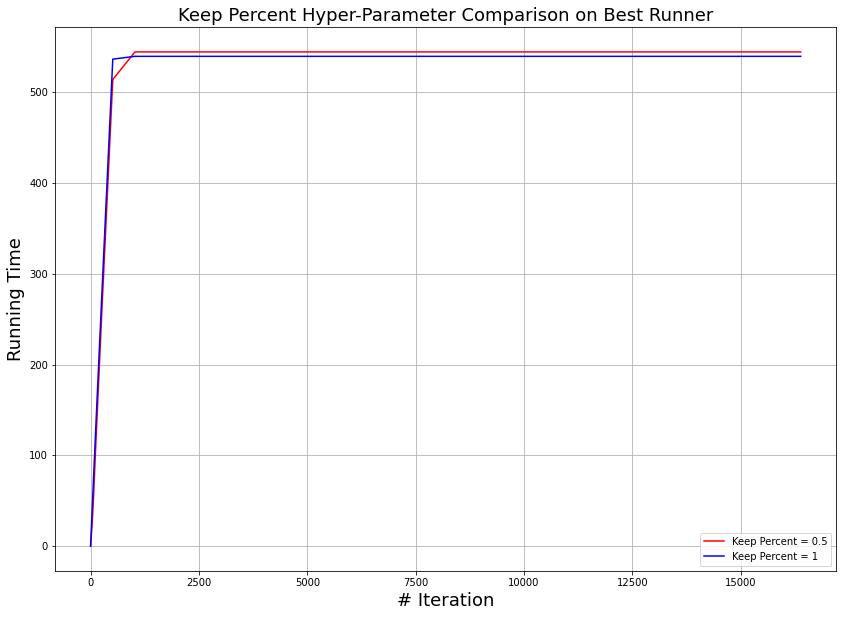

In [ ]:
iter_compare(best_params_mc['Iteration'], best_params_mc['Time'], df_stats_mc_high_Keep['Time'], 'Keep Percent = 0.5', 'Keep Percent = 1', '# Iteration', 'Running Time', 'Keep Percent Hyper-Parameter')

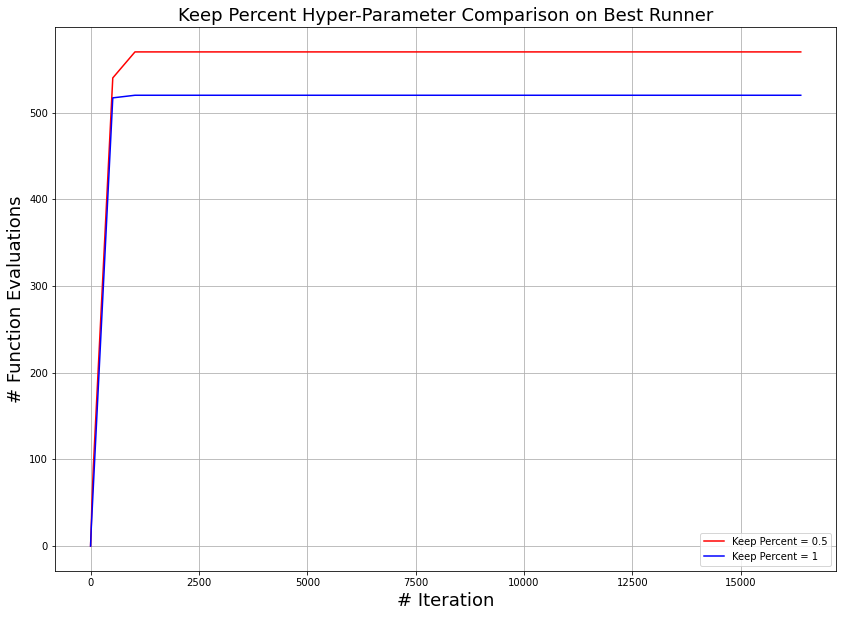

In [ ]:
iter_compare(best_params_mc['Iteration'], best_params_mc['FEvals'], df_stats_mc_high_Keep['FEvals'], 'Keep Percent = 0.5', 'Keep Percent = 1', '# Iteration', '# Function Evaluations', 'Keep Percent Hyper-Parameter')

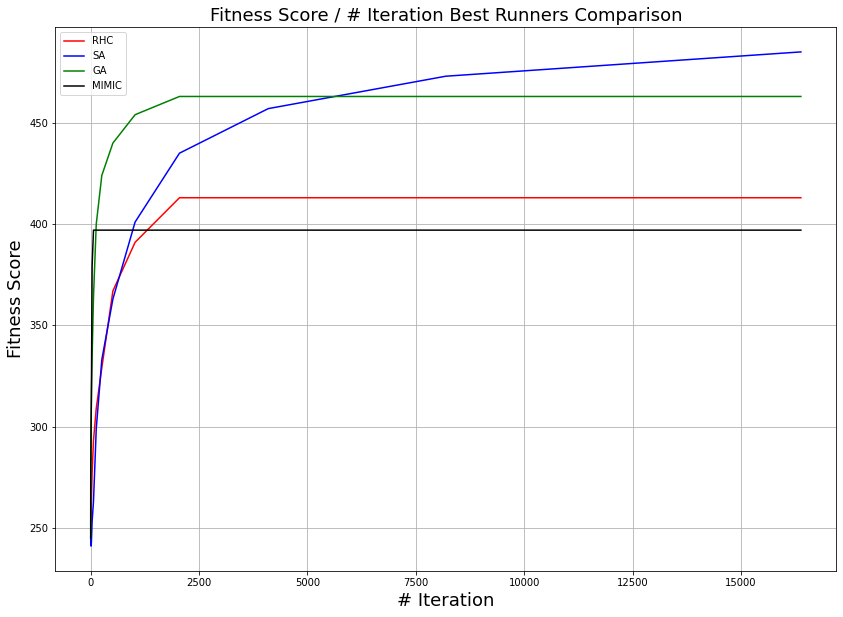

In [ ]:
iter_final_compare(best_params_rhc['Iteration'], best_params_rhc['Fitness'], best_params_sa['Fitness'],
                   best_params_ga['Fitness'], best_params_mc['Fitness'], 'RHC', 'SA', 'GA', 'MIMIC',
                    '# Iteration', 'Fitness Score', 'Fitness Score / # Iteration')

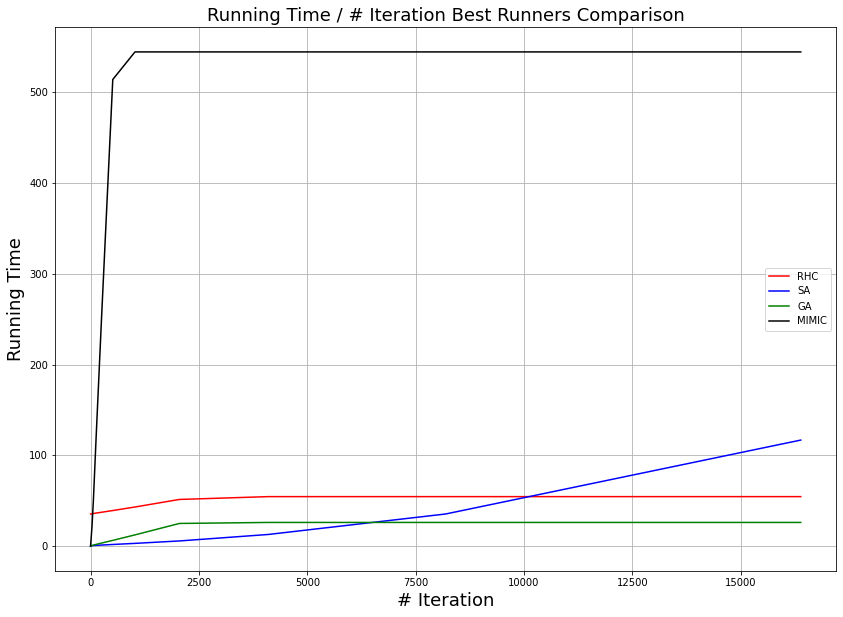

In [ ]:
iter_final_compare(best_params_rhc['Iteration'], best_params_rhc['Time'], best_params_sa['Time'],
                   best_params_ga['Time'], best_params_mc['Time'], 'RHC', 'SA', 'GA', 'MIMIC',
                    '# Iteration', 'Running Time', 'Running Time / # Iteration')